### Nama : Bonaventura Johan P.
### NIM  : 202004560022
### FSG102 - Statistika Ilmu Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [ ]:
df = pd.read_csv('/content/heart.csv', encoding = 'latin1')

In [ ]:
df.head(6)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.shape

(918, 12)

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df['HeartDisease'] = df['HeartDisease'].astype('bool')
df['Oldpeak'] = df['Oldpeak'].astype('int')

In [ ]:
dfi=df.drop(columns=['Cholesterol','MaxHR','Sex',
                     'ChestPainType','RestingECG','ExerciseAngina','ST_Slope',
                     ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


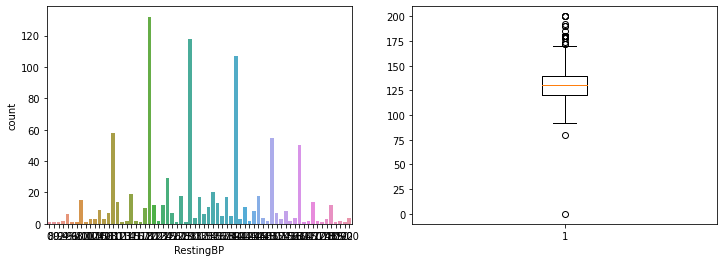

In [ ]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['RestingBP'])

f.add_subplot(1,2,2)
plt.boxplot(df['RestingBP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


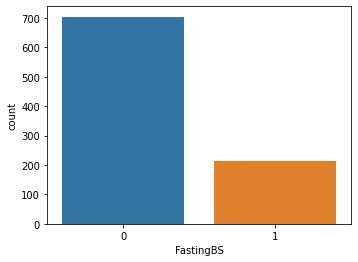

In [ ]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['FastingBS'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


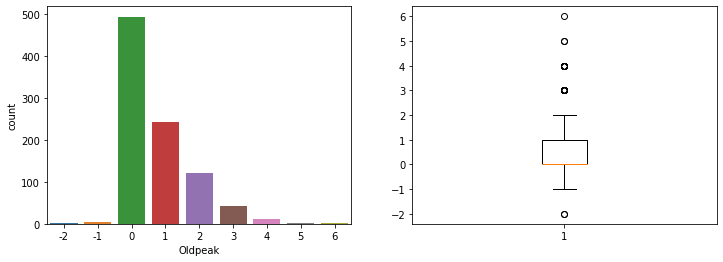

In [ ]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Oldpeak'])

f.add_subplot(1,2,2)
plt.boxplot(df['Oldpeak'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


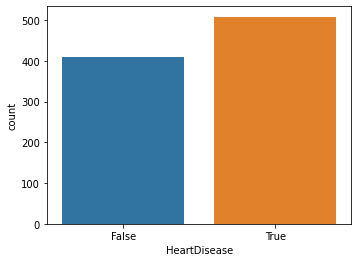

In [ ]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['HeartDisease'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

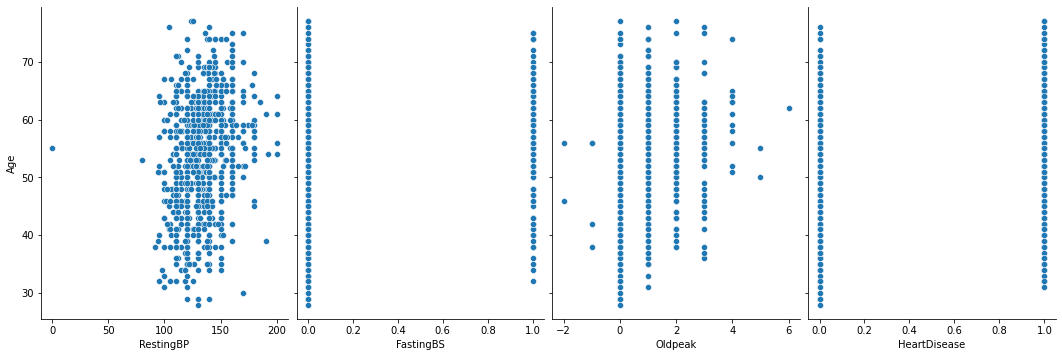

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['RestingBP','FastingBS','Oldpeak','HeartDisease'], y_vars=['Age'], size=5, aspect=0.75)

In [ ]:
dfi.corr().style.background_gradient().set_precision(2)

,Age,RestingBP,FastingBS,Oldpeak,HeartDisease
Age,1.00,0.25,0.20,0.22,0.28
RestingBP,0.25,1.00,0.07,0.16,0.11
FastingBS,0.20,0.07,1.00,0.04,0.27
Oldpeak,0.22,0.16,0.04,1.00,0.39
HeartDisease,0.28,0.11,0.27,0.39,1.00


In [ ]:
corr = stats.pearsonr(dfi["RestingBP"], df["Age"])
print("p-value:\t", corr[1])
print("corr:\t\t", corr[0])

p-value:	 5.0147697437822694e-15
corr:		 0.2543993561515448


In [ ]:
corr = stats.pearsonr(dfi["FastingBS"], df["Age"])
print("p-value:\t", corr[1])
print("corr:\t\t", corr[0])

p-value:	 1.429221125981253e-09
corr:		 0.19803906586674372


In [ ]:
corr = stats.pearsonr(dfi["Oldpeak"], df["Age"])
print("p-value:\t", corr[1])
print("corr:\t\t", corr[0])

p-value:	 1.0059715158746004e-11
corr:		 0.22211088901371448


In [ ]:
corr = stats.pearsonr(dfi["HeartDisease"], df["Age"])
print("p-value:\t", corr[1])
print("corr:\t\t", corr[0])

p-value:	 3.0079532400474652e-18
corr:		 0.28203850581899725


In [ ]:
x = dfi.drop(columns= ['Age'])
y = dfi['Age']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[0.09973791 2.64567628 1.07393759 3.58420334]
37.07505051726604


In [ ]:
lin_reg.score(x_test, y_test)

0.18108439657225173